### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

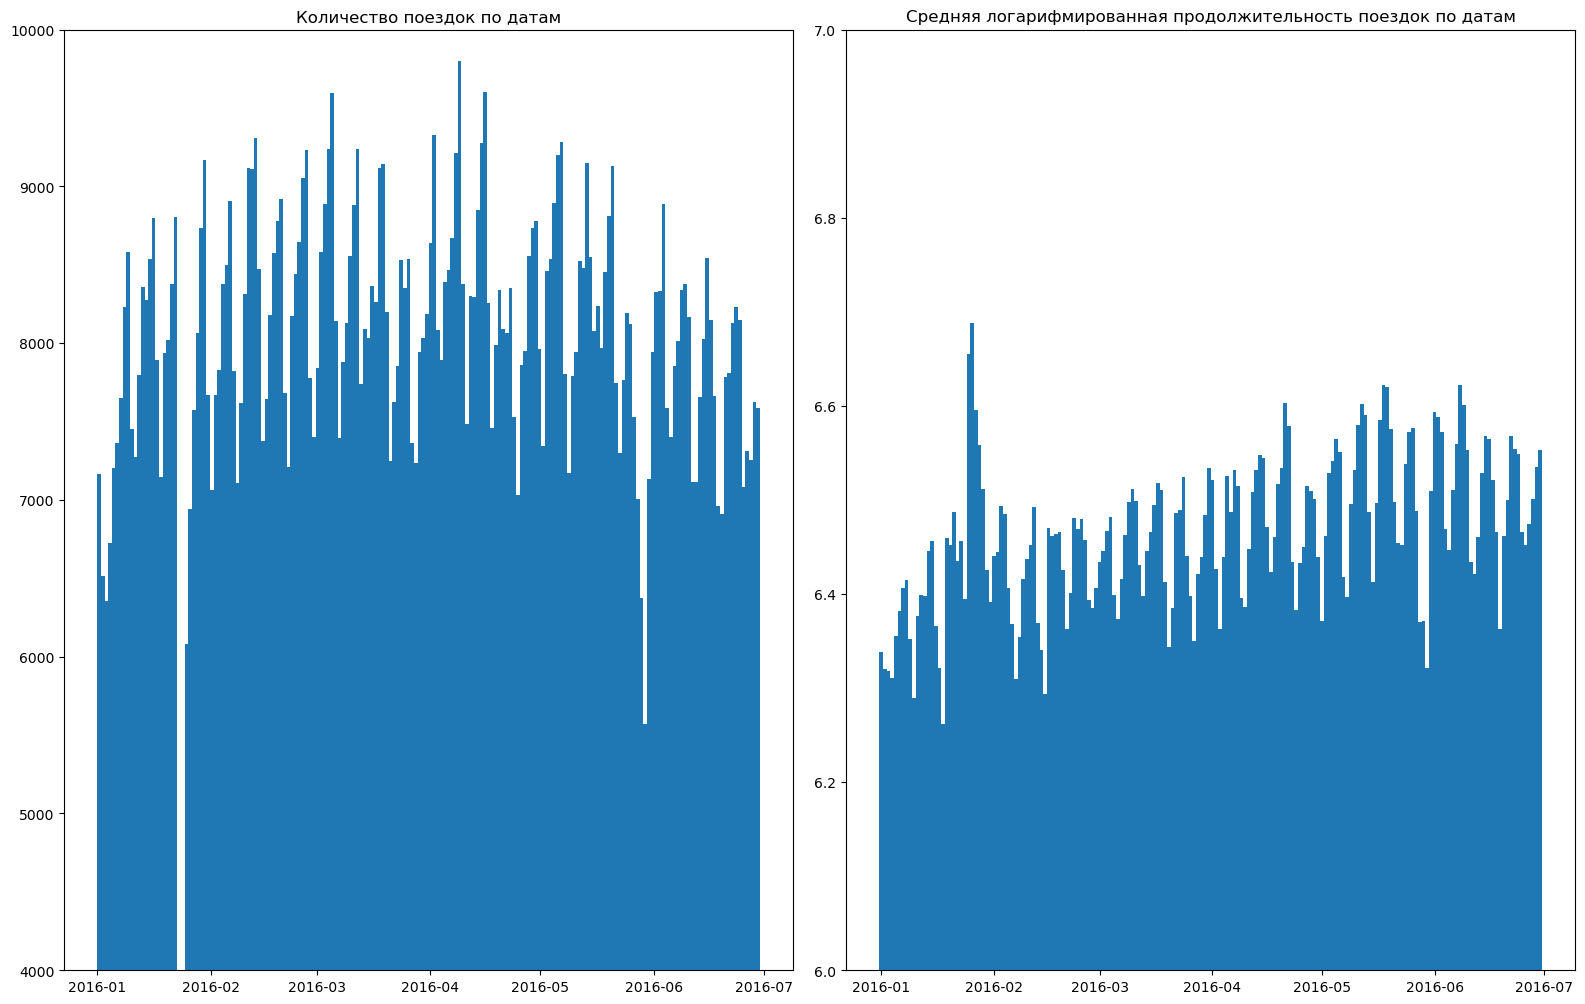

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


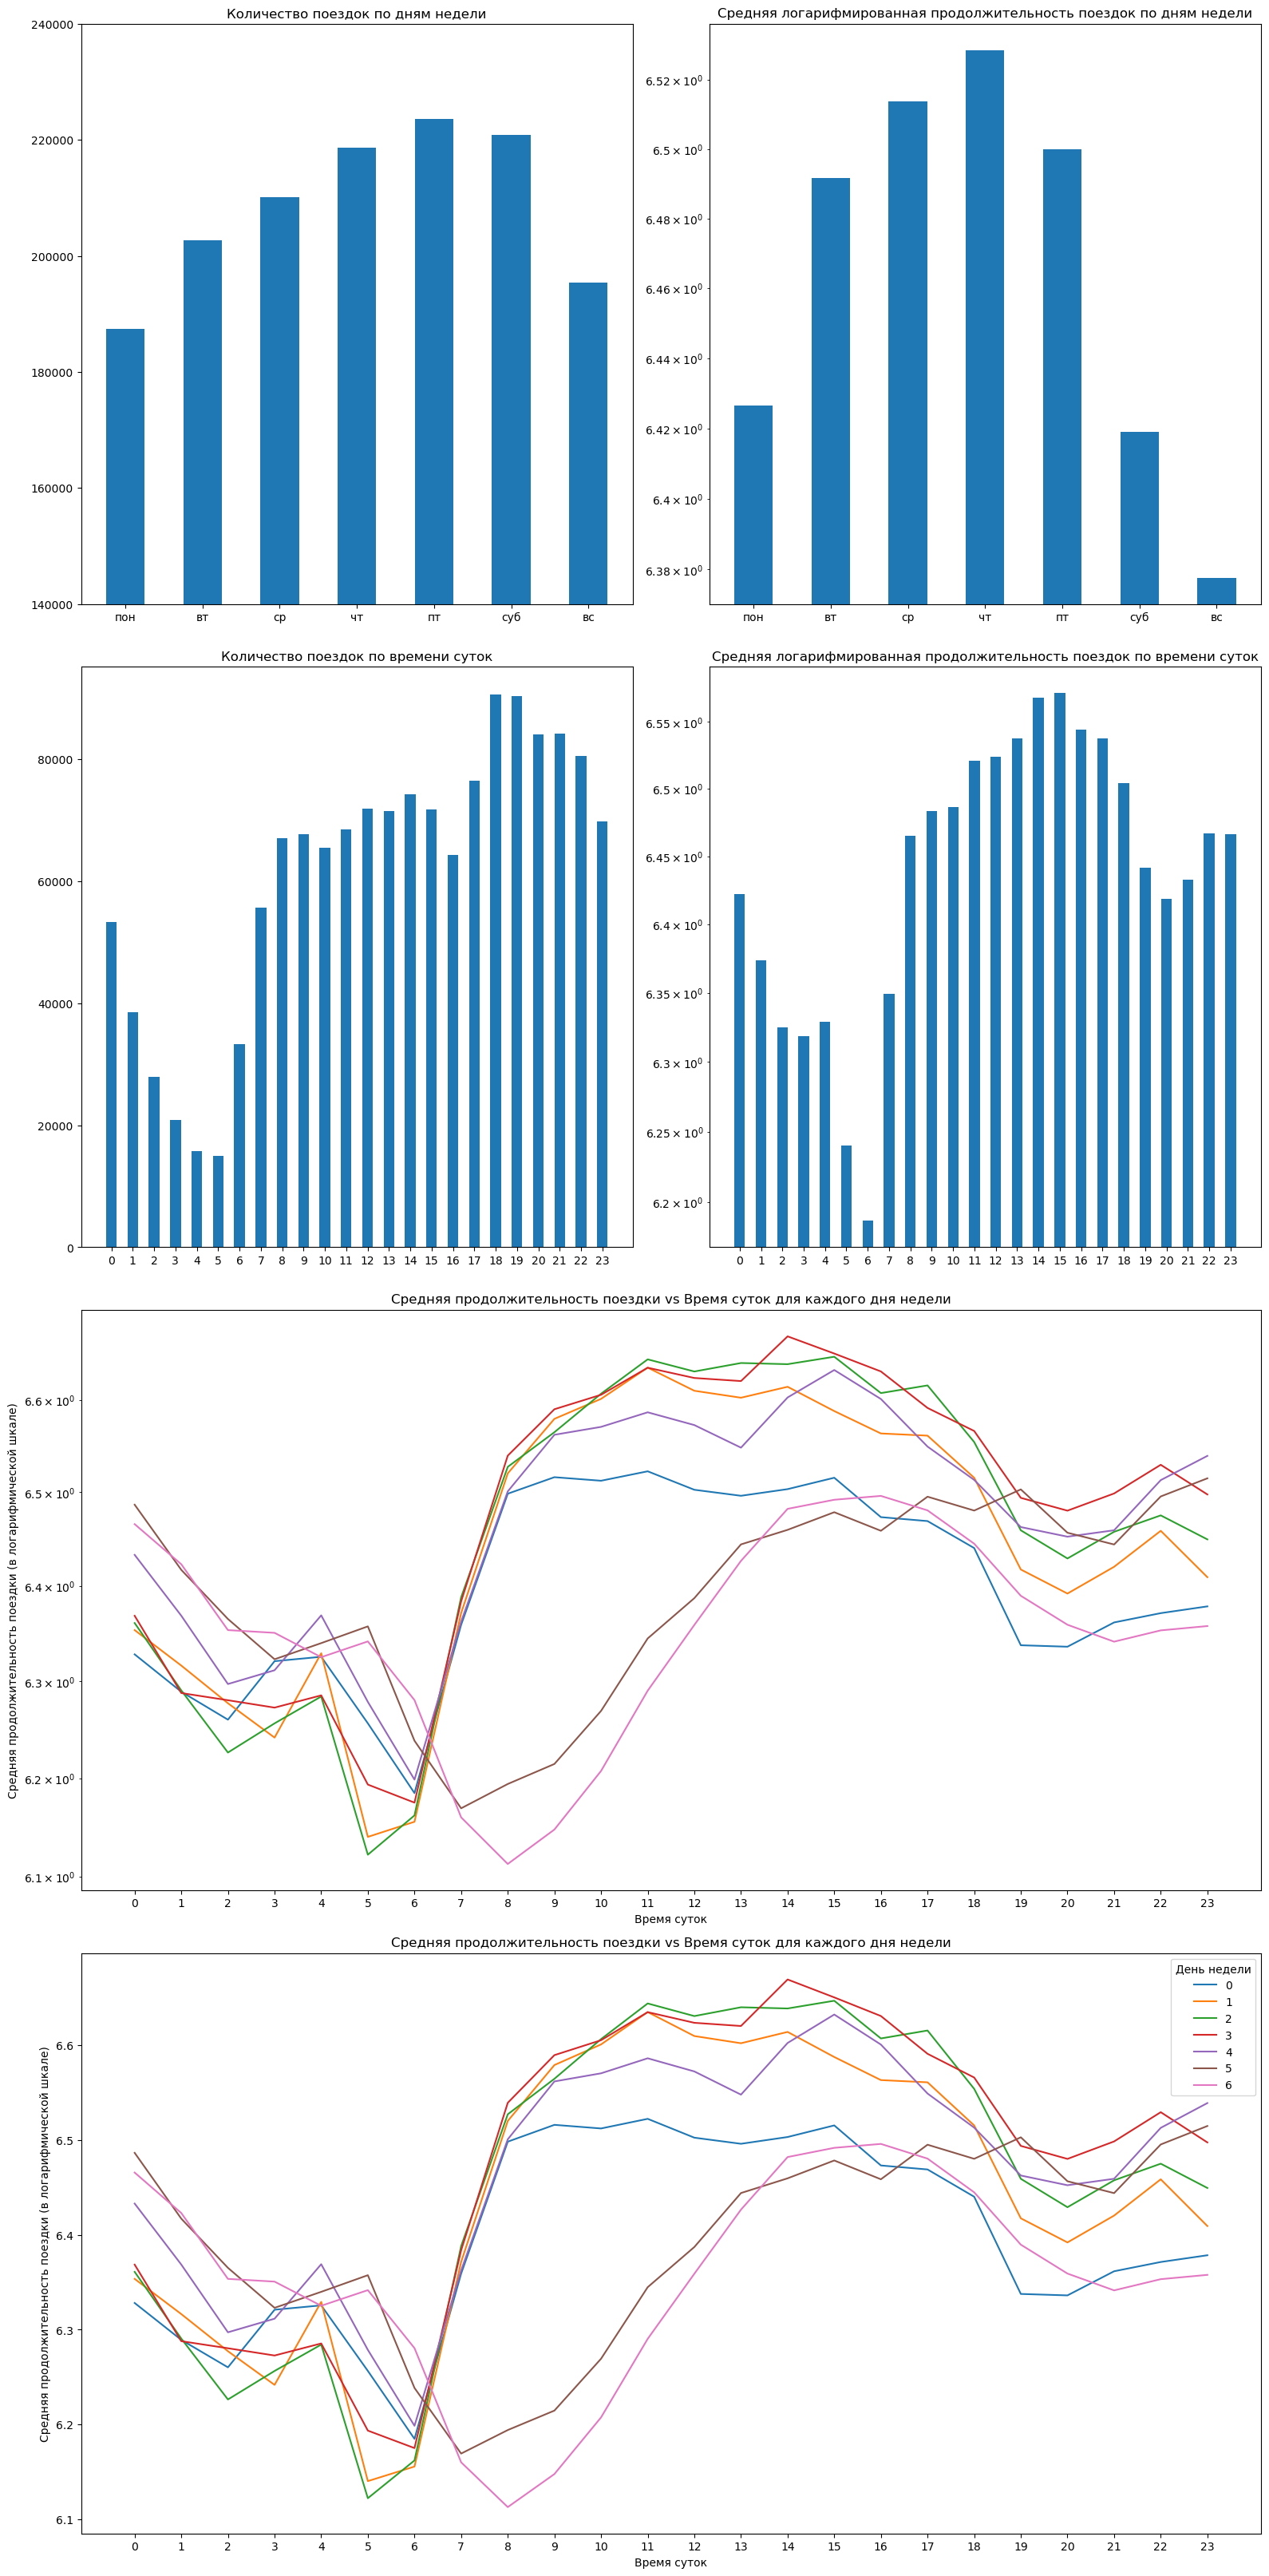

In [9]:
### Your code is here
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 40)
day_of_week = ["пон", "вт", "ср", "чт","пт", "суб", "вс"]

ax_1 = fig.add_subplot(5, 2, 1)
data_grouped_by_day = processed_data.groupby('day_of_week').count()['vendor_id']
plt.ylim((140000, 240000))
plt.bar(day_of_week,data_grouped_by_day.values, width = 0.5)
ax_1.set(title = 'Количество поездок по дням недели')

ax_2 = fig.add_subplot(5, 2, 2)
data_grouped_by_log_trip_duration = processed_data.groupby('day_of_week')['log_trip_duration'].mean()
plt.bar(day_of_week,data_grouped_by_log_trip_duration.values, width = 0.5)
ax_2.set_yscale('log')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

ax_3 = fig.add_subplot(5, 2, 3)
data_grouped_by_hour = processed_data.groupby('hour').count()['vendor_id']
hours = data_grouped_by_hour.index
plt.bar(hours,data_grouped_by_hour.values, width = 0.5)
plt.xticks(np.arange(0, 24, 1))
ax_3.set(title = 'Количество поездок по времени суток')

ax_4 = fig.add_subplot(5, 2, 4)
data_grouped_by_hour_trip_duration = processed_data.groupby('hour')['log_trip_duration'].mean()
hours = data_grouped_by_hour.index
plt.bar(hours,data_grouped_by_hour_trip_duration.values, width = 0.5)
plt.xticks(np.arange(0, 24, 1))
plt.yscale('log')
ax_4.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

ax_5 = fig.add_subplot(5,1,3)
av_trip_duration_per_week_day = processed_data.groupby(['day_of_week','hour'])['log_trip_duration'].mean().reset_index()


for day_of_week in av_trip_duration_per_week_day.reset_index()['day_of_week'].unique():
    dow_mask = av_trip_duration_per_week_day['day_of_week'] == day_of_week
    plt.plot(av_trip_duration_per_week_day.loc[dow_mask, 'hour'], 
            av_trip_duration_per_week_day.loc[dow_mask, 'log_trip_duration'],label = {day_of_week})
plt.yscale('log')
plt.xlabel("Время суток")
plt.ylabel("Средняя продолжительность поездки (в логарифмической шкале)")
plt.title("Средняя продолжительность поездки vs Время суток для каждого дня недели")
plt.xticks(range(24))

ax_6 = fig.add_subplot(5,1,4)
av_trip_duration_per_week_day = processed_data.groupby(['day_of_week','hour'])['log_trip_duration'].mean().reset_index()
pivot_table = av_trip_duration_per_week_day.pivot_table(index='hour', columns='day_of_week', values='log_trip_duration', aggfunc='mean')
for day in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[day], label=day)
plt.xlabel("Время суток")
plt.ylabel("Средняя продолжительность поездки (в логарифмической шкале)")
plt.title("Средняя продолжительность поездки vs Время суток для каждого дня недели")
plt.xticks(range(24))
plt.legend(title="День недели")

fig.tight_layout()
plt.show()


In [10]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [11]:
av_dur_of_trips_day[av_dur_of_trips_day['day_of_week'] == 1]

NameError: name 'av_dur_of_trips_day' is not defined

In [ ]:
# Количество поездок/Средняя продолжительность поездки vs День недели
# Количество поездок/Средняя продолжительность поездки vs время суток
# Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
# Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
# Ящики с усами для различных: времени суток, дня недели, месяца

import matplotlib.pyplot as plt

canvas = plt.figure()
canvas.set_size_inches(16,20)

ax1 = canvas.add_subplot(3,2,1)
num_of_trips_month = processed_data.groupby('month').count()['log_trip_duration'].reset_index()
plt.bar(num_of_trips_month['month'],num_of_trips_month['log_trip_duration'])
plt.ylim(180000,280000)

ax2 = canvas.add_subplot(3,2,2)
av_dur_of_trips_month = processed_data.groupby('month')['log_trip_duration'].mean().reset_index()
plt.bar(av_dur_of_trips_month['month'],av_dur_of_trips_month['log_trip_duration'])
plt.yscale('log')

ax3 = canvas.add_subplot(3,2,3)
av_dur_of_trips_month = processed_data.groupby('month')['log_trip_duration'].mean().reset_index()
for month in av_dur_of_trips_month['month']:
    data = av_dur_of_trips_month[av_dur_of_trips_month['month'] == month]['log_trip_duration']
    plt.boxplot(data, positions=[month], widths=0.5, labels=[str(month)])

ax4 = canvas.add_subplot(3,2,4)
av_dur_of_trips_hour = processed_data.groupby('hour')['log_trip_duration'].mean().reset_index()
for hour in av_dur_of_trips_hour['hour']:
    data = av_dur_of_trips_hour[av_dur_of_trips_hour['hour'] == hour]['log_trip_duration']
    plt.boxplot(data, positions=[hour], widths=0.5, labels=[str(hour)])

    
ax5 = canvas.add_subplot(3,1,3)
av_dur_of_trips_day = processed_data.groupby('day_of_week')['log_trip_duration'].mean().reset_index()
for day in av_dur_of_trips_day['day_of_week']:
    data = av_dur_of_trips_day[av_dur_of_trips_day['day_of_week'] == day]['log_trip_duration']
    plt.boxplot(data, positions=[day])
plt.yscale('log')

    
plt.tight_layout()
plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(8,4)

data = processed_data.groupby(['month', 'date']).count()['log_trip_duration'].reset_index()
month_data_jan = data[data['month'] == 1]
plt.bar(month_data_jan['date'], month_data_jan['log_trip_duration'])
plt.xticks(rotation = 40)

plt.show()

##ПО графику видно что снегопад был 23-01-2016

In [12]:
### Создадим первый бинарный признак
### Your code is here
import pandas as pd

processed_data['date'] = pd.to_datetime(processed_data['date'])
processed_data.loc[processed_data['date'] == '2016-01-23','anomaly'] = 1
processed_data.loc[processed_data['date'] != '2016-01-23', 'anomaly'] = 0


In [16]:
### Создадим второй бинарный признак
### Your code is here

data = processed_data.groupby(['day_of_week','hour'])['log_trip_duration'].mean().reset_index()
pick_time_list = data.sort_values('log_trip_duration',ascending=False)[:10]
processed_data['traffic_jam'] = 0
processed_data.loc[
    (processed_data['hour'].isin(pick_time_list['hour'])) & 
    (processed_data['day_of_week'].isin(pick_time_list['day_of_week'])), 
    'traffic_jam'] = 1

In [14]:
data.sort_values('log_trip_duration',ascending=False)[:10]

,day_of_week,hour,log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [15]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0.0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0.0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0.0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0.0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0.0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [ ]:
processed_data = processed_data.drop(['pickup_datetime','date'], axis =1)

In [ ]:
### Делаем OneHotEncoding и конкатим с processed_data
import pandas as pd

for col in ['day_of_week', 'hour', 'month']:
   
    ### Your code is here
    encoded_columns = pd.get_dummies(processed_data[col], prefix=col)
    encoded_columns = encoded_columns.astype(int)
    processed_data = pd.concat((processed_data,encoded_columns),axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')
processed_data = processed_data.drop(['day_of_week_0','hour_0','month_1'], axis =1) #удаляем первый столбцы для того чтобы убрать линейную зависимость

In [ ]:
processed_data = processed_data.drop(['day_of_week','hour','month'], axis =1)

In [620]:

processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [621]:
processed_data[:5].to_csv('Hw7.4.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [622]:
### Your code is here

round(processed_data[['distance_km', 'passenger_count']].corr(),3)


,distance_km,passenger_count
distance_km,1.000,0.017
passenger_count,0.017,1.000


In [623]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
x = processed_data.drop(['log_trip_duration'], axis=1)
y = processed_data['log_trip_duration']

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select= 5)
sfs.fit(x,y)
sfs.get_feature_names_out()


In [ ]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

In [ ]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
processed_data_new = x[sfs.get_feature_names_out()]
model.fit(processed_data_new,y)
error = np.mean((model.predict(processed_data_new) - y) ** 2)
round(error,3)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
varience = VarianceThreshold(threshold = 1)
varience.fit(x)
varience.get_feature_names_out()